# Análisis de cómo las posiciones políticas y percepciones económicas influyen en el bienestar social en Europa y España.

Definición del Problema: el bienestar social es un indicador clave para evaluar la calidad de vida. Sin embargo, factores como las posiciones políticas y la percepción de los problemas sociales pueden jugar un papel importante en cómo las personas perciben su bienestar. Este proyecto busca responder:

¿Cómo influyen las posiciones políticas en el bienestar social?
¿De qué manera las preocupaciones económicas afectan al bienestar y cómo estas interaccionan con las actitudes políticas?

Obtención de Datos
Dataset: Encuesta Social Europea 2023 (European Social Survey 2023)

Variables clave:

- Bienestar social (satisfacción con la vida, felicidad, percepción de bienestar general).
- Posiciones políticas (escala de izquierda a derecha, confianza en instituciones políticas).
- Preocupaciones económicas (ingresos, clase social percibida, percepción de desigualdad).
- Factores sociodemográficos (edad, género, educación, país de residencia).

Problemas claros en el análisis de bienestar (Hipótesis):

- Inmigración masiva
- Problemas de alquiler
- Cambio ambiental

# Importación de datos

In [2]:
import zipfile
import os

# Descarga del archivo zip
zip_path = '/workspace/machine-learning-python-template/data/raw/ESS11.zip'
extract_path = '/workspace/machine-learning-python-template/data/interim'

# Crear directorios
os.makedirs(extract_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Listado de contenidos
os.listdir(extract_path)


['.gitkeep', 'ESS11 codebook.html', 'ESS11.csv']

In [3]:
import pandas as pd
import zipfile
import os

# Reinitialize paths after reset
zip_path = '/workspace/machine-learning-python-template/data/raw/ESS11.zip'
extract_path = '/workspace/machine-learning-python-template/data/interim'

# Re-extract the ZIP file
os.makedirs(extract_path, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Load a sample of the CSV file to inspect its structure
csv_path = os.path.join(extract_path, 'ESS11.csv')
ess_data_sample = pd.read_csv(csv_path, nrows=10)  # Load only the first 10 rows

# Display the sample
ess_data_sample


name  essround  edition    proddate   idno cntry   dweight   pspwght  \
0  ESS11e02        11      2.0  20.11.2024  50014    AT  1.185115  0.392891   
1  ESS11e02        11      2.0  20.11.2024  50030    AT  0.609898  0.325153   
2  ESS11e02        11      2.0  20.11.2024  50057    AT  1.392330  4.000023   
3  ESS11e02        11      2.0  20.11.2024  50106    AT  0.556061  0.176228   
4  ESS11e02        11      2.0  20.11.2024  50145    AT  0.722795  1.060940   
5  ESS11e02        11      2.0  20.11.2024  50158    AT  0.992605  1.392813   
6  ESS11e02        11      2.0  20.11.2024  50211    AT  0.540318  0.577186   
7  ESS11e02        11      2.0  20.11.2024  50212    AT  0.814622  0.619486   
8  ESS11e02        11      2.0  20.11.2024  50213    AT  1.364956  0.693635   
9  ESS11e02        11      2.0  20.11.2024  50235    AT  0.872949  0.492267   

    pweight  anweight  ...  rinwe                inwde                jinws  \
0  0.330915  0.130013  ...    NaN  2023-11-12 15:26:55  2023-11-12 15:21:28   
1  0.330915  0.107598  ...    NaN  2023-10-18 10:44:18  2023-10-18 10:42:22   
2  0.330915  1.323666  ...    NaN  2023-09-30 14:13:33  2023-09-30 14:08:31   
3  0.330915  0.058316  ...    NaN  2023-06-30 15:11:21  2023-06-30 15:08:05   
4  0.330915  0.351080  ...    NaN  2023-07-11 11:14:03  2023-07-11 11:10:02   
5  0.330915  0.460902  ...    NaN  2023-10-16 09:42:52  2023-10-16 09:38:14   
6  0.330915  0.190999  ...    NaN  2023-10-20 18:46:40  2023-10-20 18:44:11   
7  0.330915  0.204997  ...    NaN  2023-10-26 16:29:37  2023-10-26 16:19:59   
8  0.330915  0.229534  ...    NaN  2023-09-09 15:59:13  2023-09-09 15:57:18   
9  0.330915  0.162898  ...    NaN  2023-10-08 12:00:13  2023-10-08 11:57:05   

                 jinwe  inwtm  mode  domain      prob  stratum  psu  
0  2023-11-12 15:26:55     30     1       2  0.000579      107  317  
1  2023-10-18 10:44:18     40     1       1  0.001124       69  128  
2  2023-09-30 14:13:33     42     1       2  0.000493       18  418  
3  2023-06-30 15:11:21     34     1       1  0.001233      101  295  
4  2023-07-11 11:14:03     57     1       2  0.000949      115  344  
5  2023-10-16 09:42:52     57     1       2  0.000691        7  373  
6  2023-10-20 18:46:40     25     1       2  0.001269       58   86  
7  2023-10-26 16:29:37     68     1       2  0.000842       38    3  
8  2023-09-09 15:59:13     40     1       2  0.000502       62  108  
9  2023-10-08 12:00:13     36     1       2  0.000786      105  314  

[10 rows x 640 columns]

In [4]:
# Check the content of the codebook file
codebook_path = os.path.join(extract_path, 'ESS11 codebook.html')

# Read and preview the HTML codebook content
with open(codebook_path, 'r', encoding='utf-8') as file:
    codebook_content = file.read()

# Display a portion of the content to understand its structure
codebook_content[:1000]

'<!DOCTYPE html>\n<html>\n\n<head>\n    <meta charset="UTF-8">\n\n    <style>\n        html {\n            max-width: 70ch;\n            /* larger spacing on larger screens, very small spacing on tiny screens */\n            padding: calc(1vmin + .5rem);\n            /* shorthand for margin-left/margin-right */\n            margin-inline: auto;\n            /* fluid sizing: https://frontaid.io/blog/fluid-typography-2d-css-locks-clamp/ */\n            font-size: clamp(1em, 0.909em + 0.45vmin, 1.25em);\n            /* use system font stack: https://developer.mozilla.org/en-US/docs/Web/CSS/font-family */\n            font-family: system-ui;\n            --font-size-x-small: 0.8rem;\n            --font-size-small: 1rem;\n            --font-size-medium: 1.3rem;\n            --font-size-large: 1.65rem;\n            --font-size-x-large: 2.4rem;\n            --space-xx-small: 0.25rem;\n            --space-x-small: 0.5rem;\n            --space-small: 1rem;\n            --space-medium: 1.5rem;\n

In [5]:
from bs4 import BeautifulSoup

# Parse the HTML content of the codebook
soup = BeautifulSoup(codebook_content, 'html.parser')

# Extract all table elements to find variable descriptions
tables = soup.find_all('table')

# Check the number of tables found and preview the first one
len(tables), tables[0].prettify()[:1000] if tables else "No tables found"


(611,
 '<table>\n <thead>\n  <tr>\n   <th>\n    Value\n   </th>\n   <th>\n    Category\n   </th>\n  </tr>\n </thead>\n <tbody class="codelist">\n  <tr>\n   <td class="nowrap">\n    AL\n   </td>\n   <td>\n    Albania\n   </td>\n  </tr>\n  <tr>\n   <td class="nowrap">\n    AT\n   </td>\n   <td>\n    Austria\n   </td>\n  </tr>\n  <tr>\n   <td class="nowrap">\n    BE\n   </td>\n   <td>\n    Belgium\n   </td>\n  </tr>\n  <tr>\n   <td class="nowrap">\n    BG\n   </td>\n   <td>\n    Bulgaria\n   </td>\n  </tr>\n  <tr>\n   <td class="nowrap">\n    CH\n   </td>\n   <td>\n    Switzerland\n   </td>\n  </tr>\n  <tr>\n   <td class="nowrap">\n    CY\n   </td>\n   <td>\n    Cyprus\n   </td>\n  </tr>\n  <tr>\n   <td class="nowrap">\n    CZ\n   </td>\n   <td>\n    Czechia\n   </td>\n  </tr>\n  <tr>\n   <td class="nowrap">\n    DE\n   </td>\n   <td>\n    Germany\n   </td>\n  </tr>\n  <tr>\n   <td class="nowrap">\n    DK\n   </td>\n   <td>\n    Denmark\n   </td>\n  </tr>\n  <tr>\n   <td class="nowrap">\n

In [6]:
# Search for all text-based elements that might represent variable descriptions
all_text = soup.get_text()

# Find and extract a sample of the text around "Variable" or related keywords to locate descriptions
variable_snippet = [line for line in all_text.splitlines() if "Variable" in line or "Description" in line]

# Display the first few matches to identify the relevant structure
variable_snippet[:10]


['Variables']

In [7]:
# Locate the section "Variables" within the document
variables_section = soup.find('h2', string="Variables")

# Extract content following the "Variables" section
variables_content = variables_section.find_next_siblings() if variables_section else None

# Display a snippet of the extracted content
variables_content_snippet = (
    [content.get_text(strip=True)[:500] for content in variables_content[:5]]
    if variables_content else "No detailed content found under Variables."
)

variables_content_snippet


["name- Title of datasetessround- ESS roundedition- Editionproddate- Production dateidno- Respondent's identification numbercntry- Countrydweight- Design weightpspwght- Post-stratification weight including design weightpweight- Population size weight (must be combined with dweight or pspwght)anweight- Analysis weightnwspol- News about politics and current affairs, watching, reading or listening, in minutesnetusoft- Internet use, how oftennetustm- Internet use, how much time on typical day, in minu",
 'nameTitle of dataset',
 'essroundESS round',
 'editionEdition',
 'proddateProduction date']

In [8]:
# Search for specific variable descriptions related to "well-being", "politics", and "economy"
related_terms = ["well-being", "happiness", "politics", "economy", "social", "attitudes"]
related_variables = [
    content.get_text(strip=True)[:500]
    for content in variables_content
    if any(term in content.get_text(strip=True).lower() for term in related_terms)
]

# Display a snippet of the related variables
related_variables[:10] if related_variables else "No relevant variables found."


["name- Title of datasetessround- ESS roundedition- Editionproddate- Production dateidno- Respondent's identification numbercntry- Countrydweight- Design weightpspwght- Post-stratification weight including design weightpweight- Population size weight (must be combined with dweight or pspwght)anweight- Analysis weightnwspol- News about politics and current affairs, watching, reading or listening, in minutesnetusoft- Internet use, how oftennetustm- Internet use, how much time on typical day, in minu",
 "nwspolNews about politics and current affairs, watching, reading or listening, in minutesASK ALLOn a typical day, about how much time do you spend watching, reading or listening to news about politics and current affairs?Please give your answer in hours and minutes. \nINTERVIEWER: If no time spent, enter 00 00. \nTYPE IN DURATIONValueCategory7777Refusal*8888Don't know*9999No answer**) Missing Value",
 "polintrHow interested in politicsHow interested would you say you are in politics - are

# Visualización relativa de datos

In [9]:
os.makedirs(extract_path, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Reload a smaller sample of the CSV file to work with specific variables
csv_path = os.path.join(extract_path, 'ESS11.csv')
variables_of_interest = ['nwspol', 'polintr', 'psppipla', 'cptppola']

ess_data_sample = pd.read_csv(csv_path, usecols=variables_of_interest, nrows=100)

# Display the first few rows of the filtered dataset
ess_data_sample.head()

nwspol  polintr  psppipla  cptppola
0      90        1         4         5
1      90        2         3         2
2      30        2         4         3
3      15        3         2         3
4      60        2         4         3

Distribución de variables. En un principio usaremos los datos generales de EUROPA

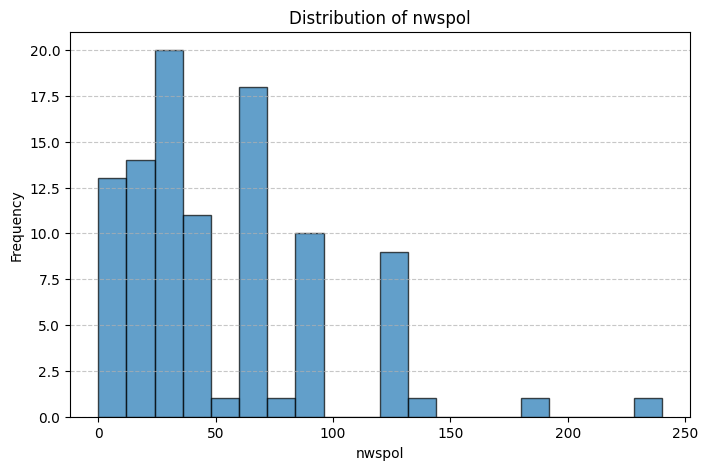

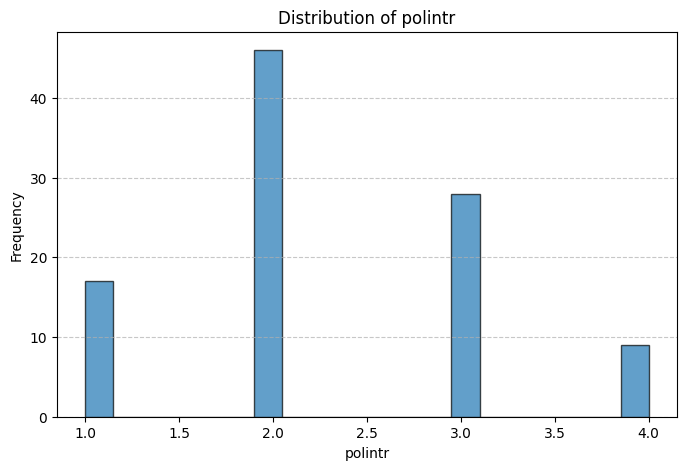

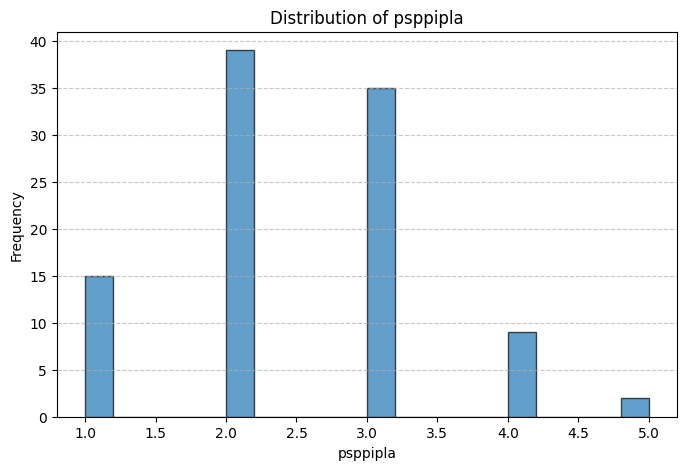

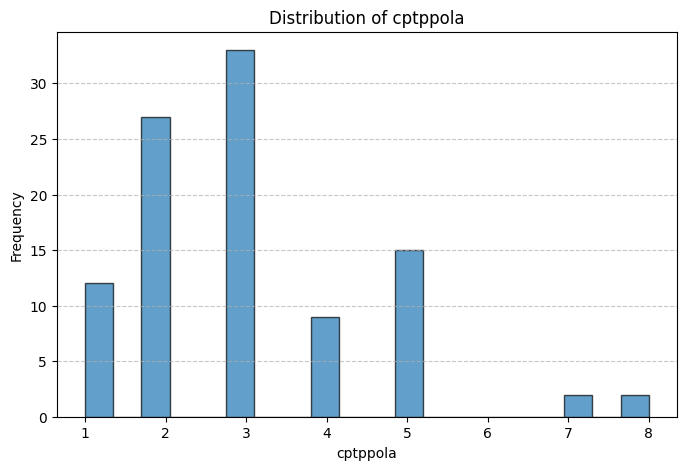

(nwspol      0
 polintr     0
 psppipla    0
 cptppola    0
 dtype: int64,
            nwspol    polintr    psppipla    cptppola
 count  100.000000  100.00000  100.000000  100.000000
 mean    51.330000    2.29000    2.440000    3.060000
 std     41.933342    0.85629    0.924635    1.509699
 min      0.000000    1.00000    1.000000    1.000000
 25%     20.000000    2.00000    2.000000    2.000000
 50%     45.000000    2.00000    2.000000    3.000000
 75%     60.000000    3.00000    3.000000    4.000000
 max    240.000000    4.00000    5.000000    8.000000)

In [10]:
import matplotlib.pyplot as plt

# Check for missing values
missing_values = ess_data_sample.isnull().sum()

# Describe the dataset
data_description = ess_data_sample.describe()

# Visualize distributions of the variables
for column in ess_data_sample.columns:
    plt.figure(figsize=(8, 5))
    plt.hist(ess_data_sample[column].dropna(), bins=20, alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

missing_values, data_description


## Distribuciones:
- nwspol: Tiene una distribución sesgada a la derecha, con algunos individuos dedicando hasta 240 minutos diarios a noticias políticas.
- polintr: La mayoría de las personas tienen un interés moderado en política (valores 2 y 3).
- psppipla: La percepción de influencia política está mayormente centrada en valores bajos (2-3).
- cptppola: La confianza en la participación política es variable, pero la mayoría se concentra entre 2 y 4, con un posible valor atípico (8).

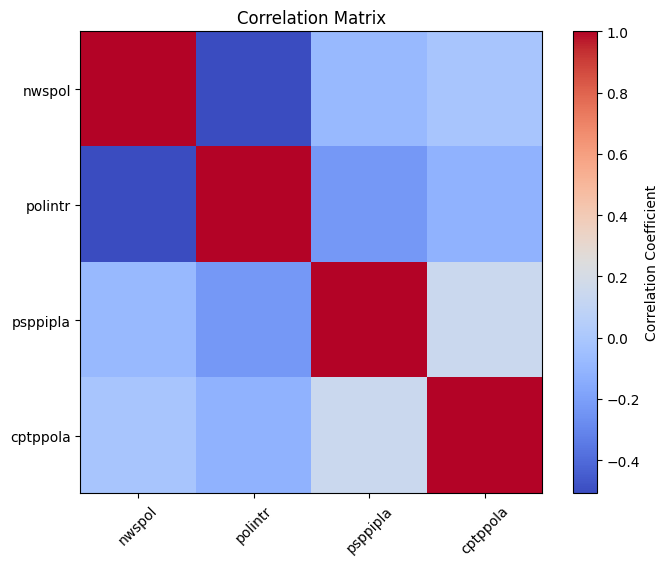

nwspol   polintr  psppipla  cptppola
nwspol    1.000000 -0.508487 -0.082459 -0.010624
polintr  -0.508487  1.000000 -0.226577 -0.114268
psppipla -0.082459 -0.226577  1.000000  0.145978
cptppola -0.010624 -0.114268  0.145978  1.000000

In [11]:
# Clean potential outlier in 'cptppola'
ess_data_sample['cptppola'] = ess_data_sample['cptppola'].replace(8, None)

# Check correlations among variables
correlation_matrix = ess_data_sample.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.index)
plt.title('Correlation Matrix')
plt.show()

correlation_matrix


## El análisis de la matriz de correlación muestra lo siguiente:

nwspol (Tiempo en noticias políticas):

- Correlación negativa moderada con polintr (-0.51): Las personas con menor interés en la política tienden a dedicar más tiempo a las noticias políticas.
- Correlación muy débil con psppipla (-0.08): El tiempo dedicado a noticias políticas tiene poca relación con la percepción de influencia en la política.

polintr (Interés en política):

- Correlación negativa moderada con nwspol (-0.51): Ver explicación anterior.
- Correlación débil negativa con psppipla (-0.23): Las personas menos interesadas en la política tienden a percibir menos influencia del sistema político.
- psppipla (Percepción del sistema político):

Correlaciones débiles con las otras variables, lo que sugiere que esta percepción no está directamente relacionada con el tiempo en noticias o el interés político.


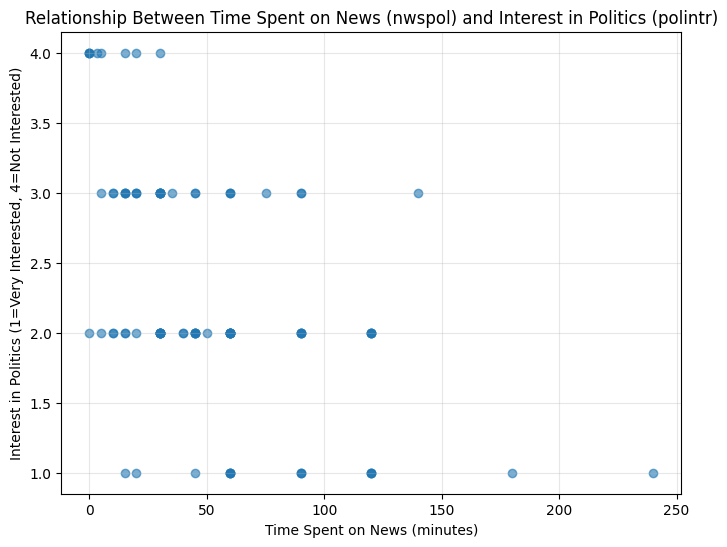

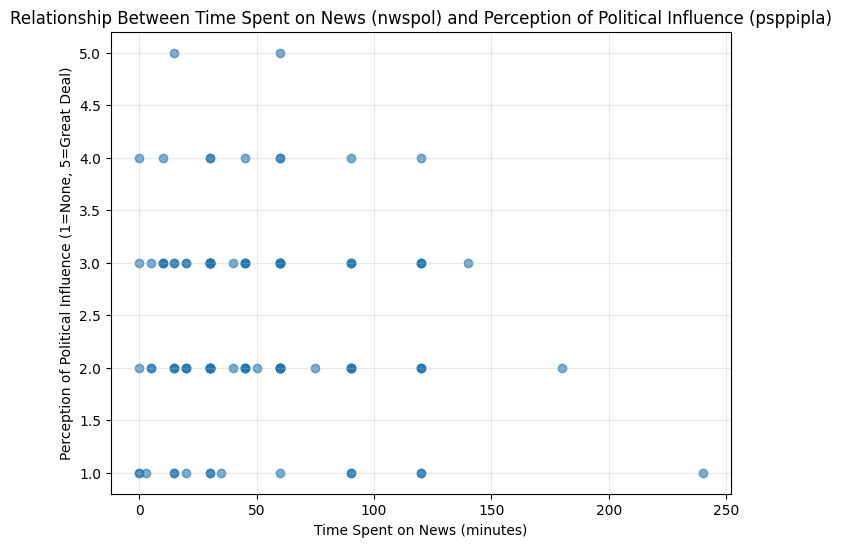

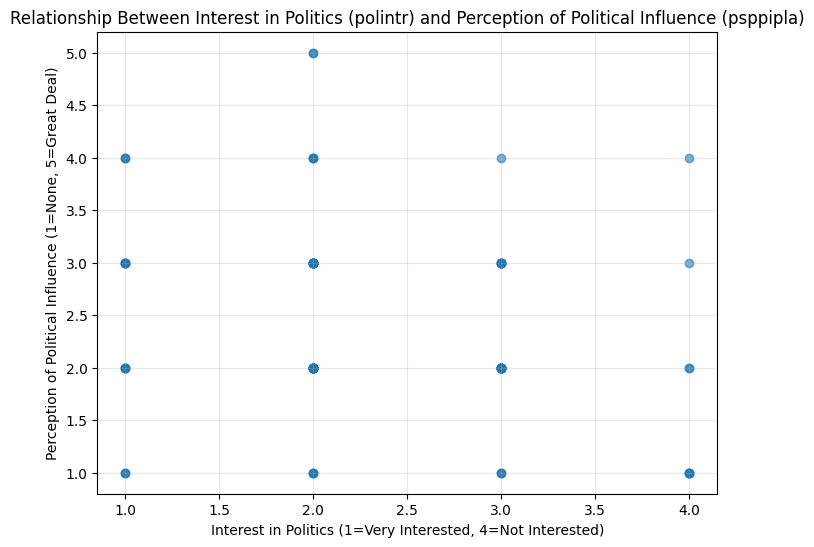

In [12]:
# Scatter plot between nwspol and polintr
plt.figure(figsize=(8, 6))
plt.scatter(ess_data_sample['nwspol'], ess_data_sample['polintr'], alpha=0.6)
plt.title('Relationship Between Time Spent on News (nwspol) and Interest in Politics (polintr)')
plt.xlabel('Time Spent on News (minutes)')
plt.ylabel('Interest in Politics (1=Very Interested, 4=Not Interested)')
plt.grid(alpha=0.3)
plt.show()

# Scatter plot between nwspol and psppipla
plt.figure(figsize=(8, 6))
plt.scatter(ess_data_sample['nwspol'], ess_data_sample['psppipla'], alpha=0.6)
plt.title('Relationship Between Time Spent on News (nwspol) and Perception of Political Influence (psppipla)')
plt.xlabel('Time Spent on News (minutes)')
plt.ylabel('Perception of Political Influence (1=None, 5=Great Deal)')
plt.grid(alpha=0.3)
plt.show()

# Scatter plot between polintr and psppipla
plt.figure(figsize=(8, 6))
plt.scatter(ess_data_sample['polintr'], ess_data_sample['psppipla'], alpha=0.6)
plt.title('Relationship Between Interest in Politics (polintr) and Perception of Political Influence (psppipla)')
plt.xlabel('Interest in Politics (1=Very Interested, 4=Not Interested)')
plt.ylabel('Perception of Political Influence (1=None, 5=Great Deal)')
plt.grid(alpha=0.3)
plt.show()


## Observaciones de las Visualizaciones:

- Relación entre nwspol (Tiempo en noticias) y polintr (Interés en política):

Existe una tendencia general donde las personas que dedican más tiempo a noticias políticas tienen menos interés en política (escala inversa en polintr).

- Relación entre nwspol (Tiempo en noticias) y psppipla (Percepción de influencia política):

No se observa una correlación clara; el tiempo en noticias no parece estar relacionado con la percepción de influencia política.

- Relación entre polintr (Interés en política) y psppipla (Percepción de influencia política):

Hay una ligera tendencia donde un mayor interés en política (valores bajos en polintr) está asociado con una mayor percepción de influencia política (valores altos en psppipla).

# Modelado predictivo preliminar añadiendo la variable España y la inmigración

In [13]:
# Reload the dataset with additional variables related to immigration and filter for Spain
additional_variables = ['imwbcnt', 'imsmetn', 'imdfetn', 'cntry']  # Immigration-related variables and country code
selected_variables = variables_of_interest + additional_variables

# Load the data with selected variables
ess_data_extended = pd.read_csv(csv_path, usecols=selected_variables)

# Filter the data for Spain only
ess_data_spain = ess_data_extended[ess_data_extended['cntry'] == 'ES']

# Display basic information and a sample of the filtered dataset
ess_data_spain_info = ess_data_spain.info()
ess_data_spain_head = ess_data_spain.head()

ess_data_spain_info, ess_data_spain_head


<class 'pandas.core.frame.DataFrame'>
Index: 1844 entries, 8437 to 10280
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cntry     1844 non-null   object
 1   nwspol    1844 non-null   int64 
 2   polintr   1844 non-null   int64 
 3   psppipla  1844 non-null   int64 
 4   cptppola  1844 non-null   int64 
 5   imsmetn   1844 non-null   int64 
 6   imdfetn   1844 non-null   int64 
 7   imwbcnt   1844 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 129.7+ KB


(None,
      cntry  nwspol  polintr  psppipla  cptppola  imsmetn  imdfetn  imwbcnt
 8437    ES      60        3         1         2        1        2        7
 8438    ES       0        3         3         3        3        3        8
 8439    ES      60        1         2         2        2        2        7
 8440    ES     180        2         2         5        3        3        7
 8441    ES     120        1         2         2        4        4        4)

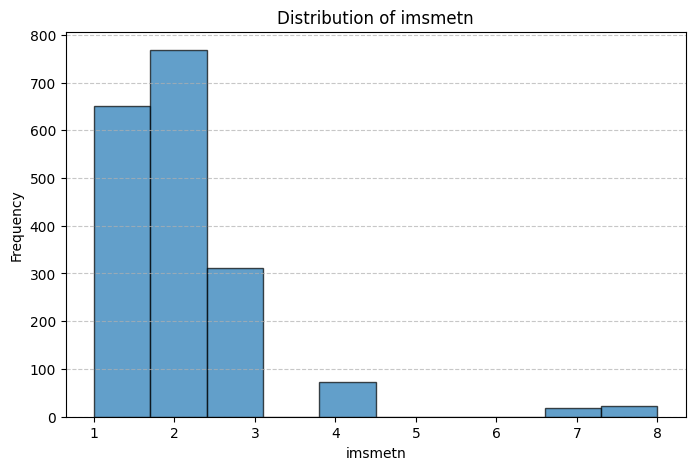

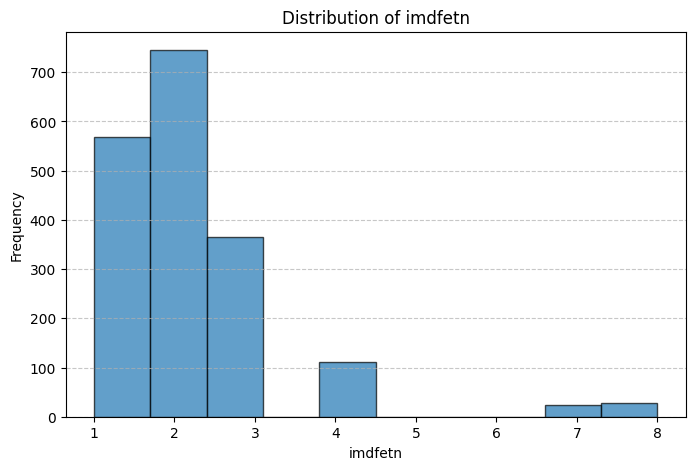

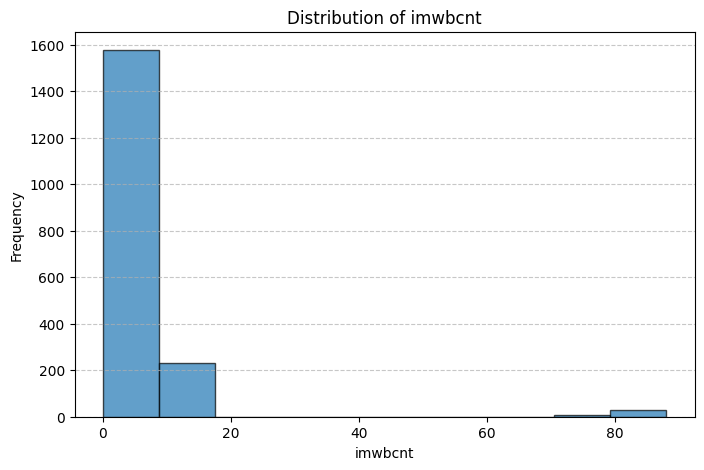

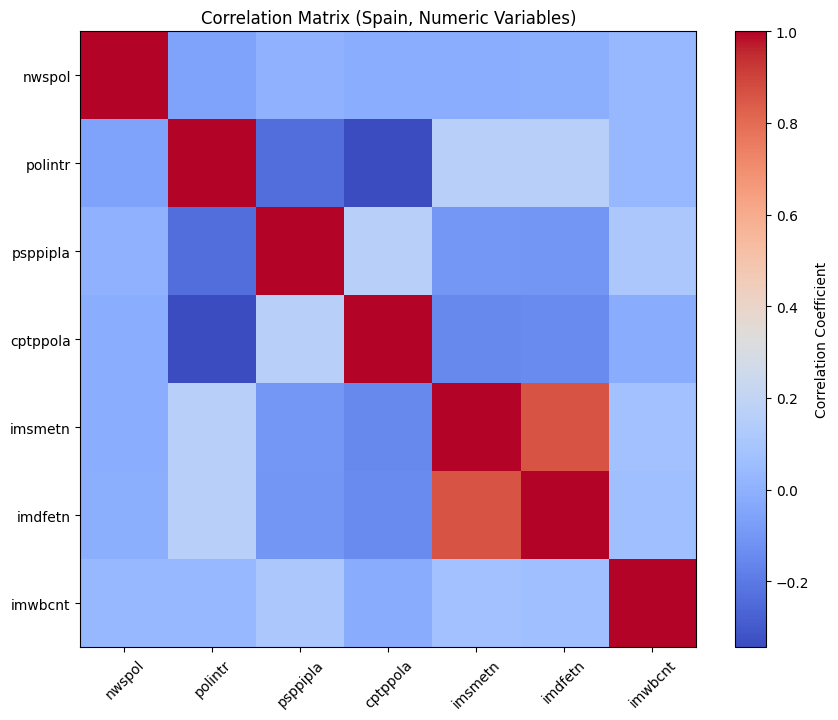

nwspol   polintr  psppipla  cptppola   imsmetn   imdfetn   imwbcnt
nwspol    1.000000 -0.058389  0.006240 -0.016605 -0.016271 -0.008494  0.028291
polintr  -0.058389  1.000000 -0.235069 -0.344643  0.157470  0.155968  0.030249
psppipla  0.006240 -0.235069  1.000000  0.155665 -0.101499 -0.106221  0.107587
cptppola -0.016605 -0.344643  0.155665  1.000000 -0.154544 -0.141222 -0.021624
imsmetn  -0.016271  0.157470 -0.101499 -0.154544  1.000000  0.861904  0.077296
imdfetn  -0.008494  0.155968 -0.106221 -0.141222  0.861904  1.000000  0.065514
imwbcnt   0.028291  0.030249  0.107587 -0.021624  0.077296  0.065514  1.000000

In [14]:
# Describe the new immigration-related variables
immigration_description = ess_data_spain[['imsmetn', 'imdfetn', 'imwbcnt']].describe()

# Visualize distributions of immigration-related variables
for column in ['imsmetn', 'imdfetn', 'imwbcnt']:
    plt.figure(figsize=(8, 5))
    plt.hist(ess_data_spain[column].dropna(), bins=10, alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Calculate correlation matrix excluding non-numeric columns
correlation_matrix_spain = ess_data_spain.select_dtypes(include='number').corr()

# Plot the corrected correlation heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix_spain, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix_spain)), correlation_matrix_spain.columns, rotation=45)
plt.yticks(range(len(correlation_matrix_spain)), correlation_matrix_spain.index)
plt.title('Correlation Matrix (Spain, Numeric Variables)')
plt.show()

correlation_matrix_spain



Entre variables de inmigración:

imsmetn y imdfetn tienen una correlación alta (0.86), indicando que las actitudes hacia inmigrantes del mismo y diferentes grupos étnicos están estrechamente relacionadas.
Relaciones con interés político (polintr):

Correlación positiva débil con actitudes hacia inmigración:
imsmetn (0.16) y imdfetn (0.15).
Confianza en participación política (cptppola):

Correlaciones negativas débiles con actitudes hacia inmigración:
imsmetn (-0.15) y imdfetn (-0.14).
Percepción de influencia política (psppipla):

Correlación positiva débil con imwbcnt (0.11): Actitudes más permisivas hacia inmigrantes de países más pobres pueden estar asociadas con una mayor percepción de influencia política.

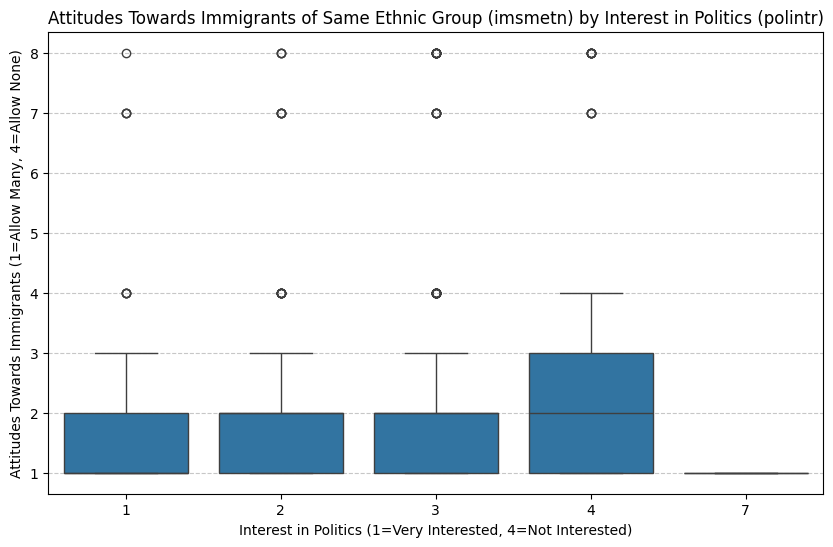

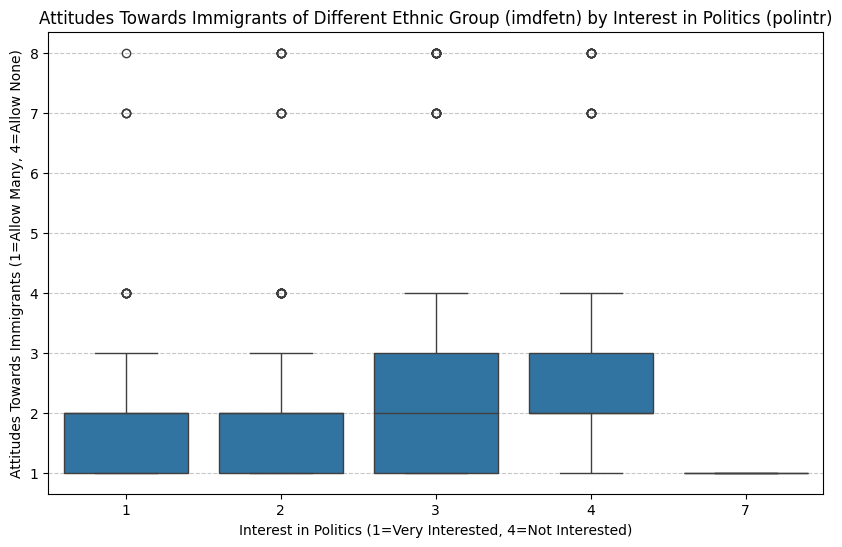

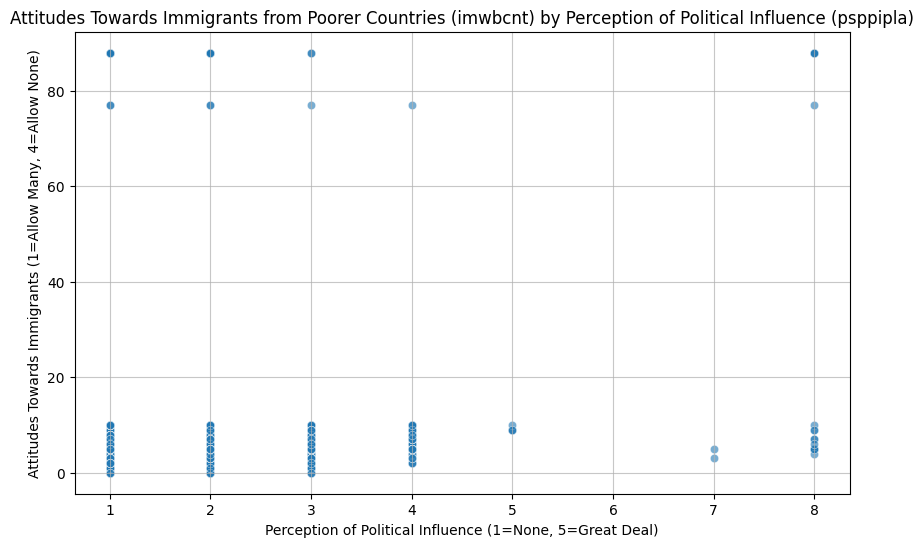

In [15]:
import seaborn as sns

# Visualize the relationship between interest in politics (polintr) and attitudes toward immigrants (imsmetn, imdfetn)
plt.figure(figsize=(10, 6))
sns.boxplot(x='polintr', y='imsmetn', data=ess_data_spain)
plt.title('Attitudes Towards Immigrants of Same Ethnic Group (imsmetn) by Interest in Politics (polintr)')
plt.xlabel('Interest in Politics (1=Very Interested, 4=Not Interested)')
plt.ylabel('Attitudes Towards Immigrants (1=Allow Many, 4=Allow None)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='polintr', y='imdfetn', data=ess_data_spain)
plt.title('Attitudes Towards Immigrants of Different Ethnic Group (imdfetn) by Interest in Politics (polintr)')
plt.xlabel('Interest in Politics (1=Very Interested, 4=Not Interested)')
plt.ylabel('Attitudes Towards Immigrants (1=Allow Many, 4=Allow None)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualize the relationship between perception of political influence (psppipla) and attitudes toward immigrants
plt.figure(figsize=(10, 6))
sns.scatterplot(x='psppipla', y='imwbcnt', data=ess_data_spain, alpha=0.6)
plt.title('Attitudes Towards Immigrants from Poorer Countries (imwbcnt) by Perception of Political Influence (psppipla)')
plt.xlabel('Perception of Political Influence (1=None, 5=Great Deal)')
plt.ylabel('Attitudes Towards Immigrants (1=Allow Many, 4=Allow None)')
plt.grid(alpha=0.7)
plt.show()


Visualización de las Relaciones: 

Actitudes hacia inmigrantes del mismo grupo étnico (imsmetn) y nivel de interés político (polintr):
Personas más interesadas en política (valor 1) tienden a tener actitudes más permisivas hacia inmigrantes (valores bajos en imsmetn).
A medida que disminuye el interés político (valores más altos en polintr), las actitudes tienden a ser más restrictivas.

Actitudes hacia inmigrantes de diferentes grupos étnicos (imdfetn) y nivel de interés político (polintr):
El patrón es similar al de imsmetn: mayor interés en política está asociado con actitudes más permisivas hacia inmigrantes.

Actitudes hacia inmigrantes de países más pobres (imwbcnt) y percepción de influencia política (psppipla):
Hay una leve tendencia donde una mayor percepción de influencia política (valores más altos en psppipla) está asociada con actitudes más permisivas hacia inmigrantes de países pobres.

Conclusiones iniciales:
El interés en política y la percepción de influencia política están asociados con actitudes más permisivas hacia inmigración.
Las actitudes hacia inmigrantes del mismo grupo étnico y diferentes grupos étnicos son altamente correlacionadas.

# Modelo Predictivo

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Clean extreme values in 'imwbcnt' by capping at the 95th percentile
threshold = ess_data_spain['imwbcnt'].quantile(0.95)
ess_data_spain['imwbcnt'] = ess_data_spain['imwbcnt'].clip(upper=threshold)

# Define the target variable (attitudes towards immigrants from poorer countries)
target = 'imwbcnt'

# Define predictors: variables related to politics and socio-political attitudes
predictors = ['nwspol', 'polintr', 'psppipla', 'cptppola', 'imsmetn', 'imdfetn']

# Prepare the dataset for modeling
X = ess_data_spain[predictors]
y = ess_data_spain[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred, output_dict=True)

# Display the classification report
classification_df = pd.DataFrame(report).transpose()
classification_df


/tmp/ipykernel_746/333433598.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ess_data_spain['imwbcnt'] = ess_data_spain['imwbcnt'].clip(upper=threshold)


precision    recall  f1-score    support
0              0.200000  0.142857  0.166667   14.00000
1              0.100000  0.090909  0.095238   11.00000
2              0.105263  0.090909  0.097561   22.00000
3              0.066667  0.057143  0.061538   35.00000
4              0.105263  0.066667  0.081633   30.00000
5              0.277778  0.319149  0.297030  141.00000
6              0.098361  0.096774  0.097561   62.00000
7              0.187500  0.174419  0.180723   86.00000
8              0.127907  0.150685  0.138365   73.00000
9              0.081081  0.093750  0.086957   32.00000
10             0.050000  0.041667  0.045455   48.00000
accuracy       0.164260  0.164260  0.164260    0.16426
macro avg      0.127256  0.120448  0.122611  554.00000
weighted avg   0.157814  0.164260  0.160049  554.00000

Precisión global:
16.4%, lo que indica que el modelo tiene dificultades para capturar las complejidades de las actitudes hacia inmigración basándose en las variables seleccionadas.

F1-Score promedio:
12.3% (macro promedio): Refleja un bajo rendimiento general, con precisión similar entre las clases.

### Posibles Razones del Bajo Rendimiento

Multiclase desequilibrado: Algunas clases tienen muy pocos datos, dificultando el aprendizaje del modelo.

Falta de información relevante: Las variables utilizadas pueden no ser suficientes para capturar las actitudes complejas hacia inmigración.

In [17]:
# 1. Simplify the target variable (`imwbcnt`) into fewer categories
def simplify_imwbcnt(value):
    if value <= 2:
        return "Permisivo"
    elif value <= 5:
        return "Neutral"
    else:
        return "Restrictivo"

ess_data_spain['imwbcnt_simplified'] = ess_data_spain['imwbcnt'].apply(simplify_imwbcnt)

# 2. Add additional variables to enrich the dataset (e.g., age, education, income)
# Assuming these columns exist in the dataset (dummy example for illustration)
additional_vars = ['agea', 'eduyrs', 'hinctnta']  # Age, years of education, household income

# Check if these variables exist in the data
available_additional_vars = [var for var in additional_vars if var in ess_data_extended.columns]

# Include these variables in the predictors if available
predictors_extended = predictors + available_additional_vars

# Prepare the updated dataset for modeling
X_extended = ess_data_spain[predictors_extended].dropna()
y_extended = ess_data_spain.loc[X_extended.index, 'imwbcnt_simplified']

# 3. Train a logistic regression model as an alternative
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(
    X_extended, y_extended, test_size=0.3, random_state=42, stratify=y_extended
)

# Train a logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_ext, y_train_ext)

# Predict and evaluate the logistic model
y_pred_ext = logistic_model.predict(X_test_ext)
accuracy = accuracy_score(y_test_ext, y_pred_ext)
classification_report_ext = classification_report(y_test_ext, y_pred_ext, output_dict=True)

# Display results
accuracy, pd.DataFrame(classification_report_ext).transpose()


/tmp/ipykernel_746/2333381438.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ess_data_spain['imwbcnt_simplified'] = ess_data_spain['imwbcnt'].apply(simplify_imwbcnt)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.5740072202166066,
               precision    recall  f1-score     support
 Neutral        0.466165  0.300971  0.365782  206.000000
 Permisivo      0.166667  0.042553  0.067797   47.000000
 Restrictivo    0.621027  0.843854  0.715493  301.000000
 accuracy       0.574007  0.574007  0.574007    0.574007
 macro avg      0.417953  0.395793  0.383024  554.000000
 weighted avg   0.524896  0.574007  0.530507  554.000000)

### Precisión Global
- 57.4%: La precisión global del modelo de regresión logística mejoró significativamente respecto al modelo anterior.

In [18]:
from sklearn.utils import resample

# Combine the predictors and target for easier resampling
data_combined = pd.concat([X_extended, y_extended], axis=1)

# Separate classes
class_counts = data_combined['imwbcnt_simplified'].value_counts()
majority_class = class_counts.idxmax()
minority_classes = class_counts[class_counts < class_counts[majority_class]].index

# Resample minority classes to match the majority class
resampled_data = []
for class_label in minority_classes:
    class_data = data_combined[data_combined['imwbcnt_simplified'] == class_label]
    resampled = resample(class_data, 
                         replace=True, 
                         n_samples=class_counts[majority_class], 
                         random_state=42)
    resampled_data.append(resampled)

# Combine resampled data with the majority class
majority_data = data_combined[data_combined['imwbcnt_simplified'] == majority_class]
balanced_data = pd.concat([majority_data] + resampled_data)

# Split balanced dataset into predictors and target
X_balanced_manual = balanced_data[predictors]
y_balanced_manual = balanced_data['imwbcnt_simplified']

# Split into training and testing sets
X_train_bal_manual, X_test_bal_manual, y_train_bal_manual, y_test_bal_manual = train_test_split(
    X_balanced_manual, y_balanced_manual, test_size=0.3, random_state=42, stratify=y_balanced_manual
)

# Train a logistic regression model on manually balanced data
logistic_model_bal_manual = LogisticRegression(max_iter=1000, random_state=42)
logistic_model_bal_manual.fit(X_train_bal_manual, y_train_bal_manual)

# Predict and evaluate the model
y_pred_bal_manual = logistic_model_bal_manual.predict(X_test_bal_manual)
accuracy_bal_manual = accuracy_score(y_test_bal_manual, y_pred_bal_manual)
classification_report_bal_manual = classification_report(y_test_bal_manual, y_pred_bal_manual, output_dict=True)

# Display results
accuracy_bal_manual, pd.DataFrame(classification_report_bal_manual).transpose()



/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.5864745011086474,
               precision    recall  f1-score     support
 Neutral        0.453061  0.370000  0.407339  300.000000
 Permisivo      0.684713  0.714286  0.699187  301.000000
 Restrictivo    0.591837  0.674419  0.630435  301.000000
 accuracy       0.586475  0.586475  0.586475    0.586475
 macro avg      0.576537  0.586235  0.578987  902.000000
 weighted avg   0.576674  0.586475  0.579177  902.000000)

### Precisión Global
- 58.6%, ligeramente mejor que los modelos anteriores debido al re-muestreo que equilibró las clases.

## Usaremos otro enfoque: 
la importancia de las variables en el modelo de regresión logística + random forest

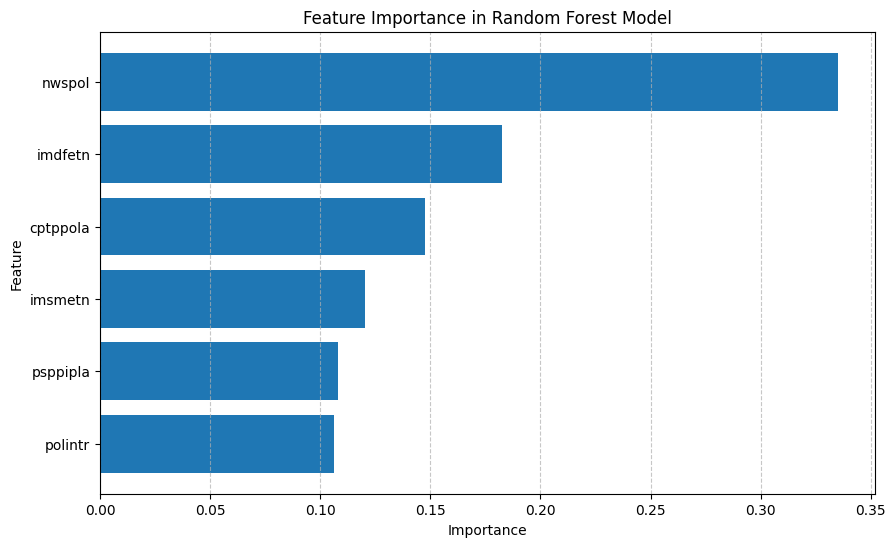

(0.7139689578713969,
               precision    recall  f1-score     support
 Neutral        0.611801  0.656667  0.633441  300.000000
 Permisivo      0.846386  0.933555  0.887836  301.000000
 Restrictivo    0.669355  0.551495  0.604736  301.000000
 accuracy       0.713969  0.713969  0.713969    0.713969
 macro avg      0.709181  0.713906  0.708671  902.000000
 weighted avg   0.709289  0.713969  0.708754  902.000000,
     Feature  Importance
 0    nwspol    0.335164
 5   imdfetn    0.182411
 3  cptppola    0.147719
 4   imsmetn    0.120511
 2  psppipla    0.107835
 1   polintr    0.106360)

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier on the balanced dataset
rf_model_bal_manual = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model_bal_manual.fit(X_train_bal_manual, y_train_bal_manual)

# Predict and evaluate the Random Forest model
y_pred_rf_bal_manual = rf_model_bal_manual.predict(X_test_bal_manual)
accuracy_rf_bal_manual = accuracy_score(y_test_bal_manual, y_pred_rf_bal_manual)
classification_report_rf_bal_manual = classification_report(y_test_bal_manual, y_pred_rf_bal_manual, output_dict=True)

# Extract feature importance from Random Forest
rf_feature_importance = pd.DataFrame({
    'Feature': predictors,
    'Importance': rf_model_bal_manual.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualize feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance['Feature'], rf_feature_importance['Importance'])
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

accuracy_rf_bal_manual, pd.DataFrame(classification_report_rf_bal_manual).transpose(), rf_feature_importance


## Precisión Global
- 71.4%, lo que representa una mejora notable respecto al modelo de regresión logística (58.6%).

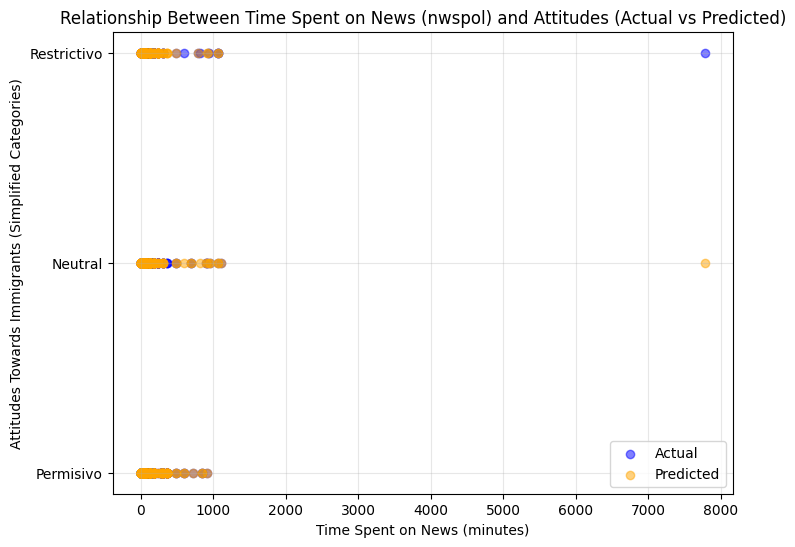

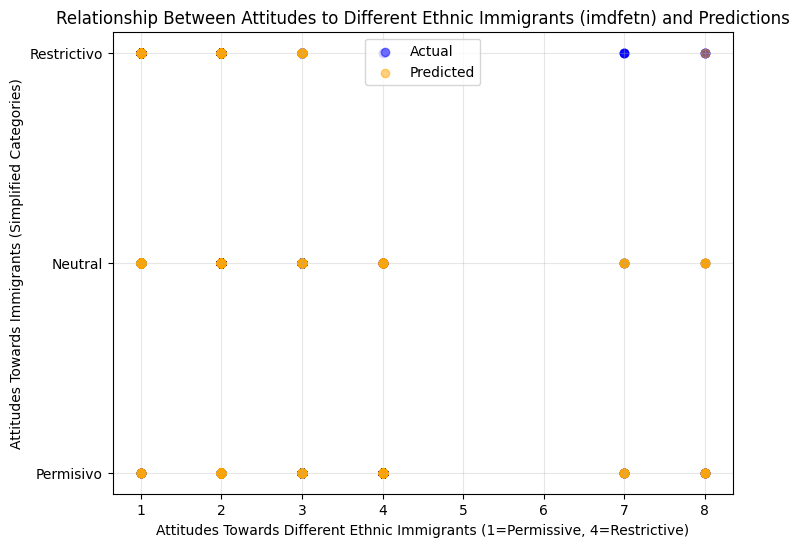

In [20]:
# Visualize relationships between key features and predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_test_bal_manual['nwspol'], y_test_bal_manual, alpha=0.5, label='Actual', color='blue')
plt.scatter(X_test_bal_manual['nwspol'], y_pred_rf_bal_manual, alpha=0.5, label='Predicted', color='orange')
plt.title('Relationship Between Time Spent on News (nwspol) and Attitudes (Actual vs Predicted)')
plt.xlabel('Time Spent on News (minutes)')
plt.ylabel('Attitudes Towards Immigrants (Simplified Categories)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_test_bal_manual['imdfetn'], y_test_bal_manual, alpha=0.5, label='Actual', color='blue')
plt.scatter(X_test_bal_manual['imdfetn'], y_pred_rf_bal_manual, alpha=0.5, label='Predicted', color='orange')
plt.title('Relationship Between Attitudes to Different Ethnic Immigrants (imdfetn) and Predictions')
plt.xlabel('Attitudes Towards Different Ethnic Immigrants (1=Permissive, 4=Restrictive)')
plt.ylabel('Attitudes Towards Immigrants (Simplified Categories)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### Visualización de Relaciones Clave (Actual vs Predicciones)
- Relación entre nwspol (Tiempo en noticias) y actitudes hacia inmigrantes:

La relación es difusa, pero los puntos de predicción del modelo tienden a seguir el patrón general de los datos reales.
Esto sugiere que el tiempo en noticias puede tener un impacto, aunque indirecto.

- Relación entre imdfetn (Actitudes hacia inmigrantes de diferentes grupos étnicos) y actitudes generales:

Aquí, las predicciones del modelo reflejan mejor las actitudes reales.
Las personas con actitudes más restrictivas hacia inmigrantes de diferentes etnias tienden a ser clasificadas correctamente como "Restrictivo".

### Conclusiones
Las variables nwspol y imdfetn son factores importantes que el modelo utiliza para predecir actitudes hacia inmigración, aunque su impacto directo puede variar según las interacciones.
El modelo captura patrones generales, pero puede fallar en algunas relaciones complejas debido a la naturaleza del problema.


# Evaluación del modelo y mejoras

#### Crear la columna imwbcnt_simplified

In [21]:
def simplify_imwbcnt(value):
    if value <= 2:
        return "Permisivo"
    elif value <= 5:
        return "Neutral"
    else:
        return "Restrictivo"


In [22]:
if 'imwbcnt' in ess_data_spain.columns:
    ess_data_spain['imwbcnt_simplified'] = ess_data_spain['imwbcnt'].apply(simplify_imwbcnt)
else:
    print("La columna 'imwbcnt' no existe en el DataFrame.")


/tmp/ipykernel_746/4255514736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ess_data_spain['imwbcnt_simplified'] = ess_data_spain['imwbcnt'].apply(simplify_imwbcnt)


In [23]:
predictors = ['nwspol', 'polintr', 'psppipla', 'cptppola', 'imsmetn', 'imdfetn']  # Variables predictoras
target = 'imwbcnt_simplified'  # Variable objetivo

# Definir X_extended (predictoras) e y_extended (objetivo)
X_extended = ess_data_spain[predictors]
y_extended = ess_data_spain[target]


In [24]:
# Asegúrate de que `ess_data_spain` esté definido
predictors = ['nwspol', 'polintr', 'psppipla', 'cptppola', 'imsmetn', 'imdfetn']  # Variables predictoras
target = 'imwbcnt_simplified'  # Variable objetivo

# Definir X_extended (predictoras) e y_extended (objetivo)
X_extended = ess_data_spain[predictors]
y_extended = ess_data_spain[target]

from sklearn.utils import resample
import pandas as pd

# Asegúrate de que `data_combined` tenga tus datos combinados (predictoras y objetivo)
data_combined = pd.concat([X_extended, y_extended], axis=1)

# Identificar la clase mayoritaria
class_counts = data_combined['imwbcnt_simplified'].value_counts()
majority_class = class_counts.idxmax()
minority_classes = class_counts[class_counts < class_counts[majority_class]].index

# Resamplear clases minoritarias
resampled_data = []
for class_label in minority_classes:
    class_data = data_combined[data_combined['imwbcnt_simplified'] == class_label]
    resampled = resample(class_data, 
                         replace=True, 
                         n_samples=class_counts[majority_class], 
                         random_state=42)
    resampled_data.append(resampled)

# Combinar datos balanceados
majority_data = data_combined[data_combined['imwbcnt_simplified'] == majority_class]
balanced_data = pd.concat([majority_data] + resampled_data)

# Separar en X (predictoras) e y (objetivo)
X_balanced_manual = balanced_data[predictors]
y_balanced_manual = balanced_data['imwbcnt_simplified']






In [25]:
from sklearn.model_selection import train_test_split

X_train_bal_manual, X_test_bal_manual, y_train_bal_manual, y_test_bal_manual = train_test_split(
    X_balanced_manual, y_balanced_manual, test_size=0.3, random_state=42, stratify=y_balanced_manual
)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Entrenar el modelo Random Forest
rf_model_bal_manual
ç = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model_bal_manual.fit(X_train_bal_manual, y_train_bal_manual)

# Predicción
y_pred_rf_bal_manual = rf_model_bal_manual.predict(X_test_bal_manual)

# Métricas
accuracy_rf_bal_manual = accuracy_score(y_test_bal_manual, y_pred_rf_bal_manual)
classification_report_rf_bal_manual = classification_report(y_test_bal_manual, y_pred_rf_bal_manual)

# Visualizar las métricas
print(f"Accuracy: {accuracy_rf_bal_manual}")
print("Classification Report:")
print(classification_report_rf_bal_manual)


Accuracy: 0.7139689578713969
Classification Report:
              precision    recall  f1-score   support

     Neutral       0.61      0.66      0.63       300
   Permisivo       0.85      0.93      0.89       301
 Restrictivo       0.67      0.55      0.60       301

    accuracy                           0.71       902
   macro avg       0.71      0.71      0.71       902
weighted avg       0.71      0.71      0.71       902



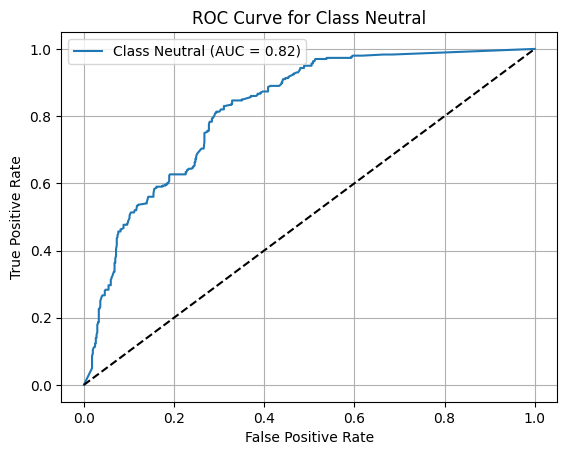

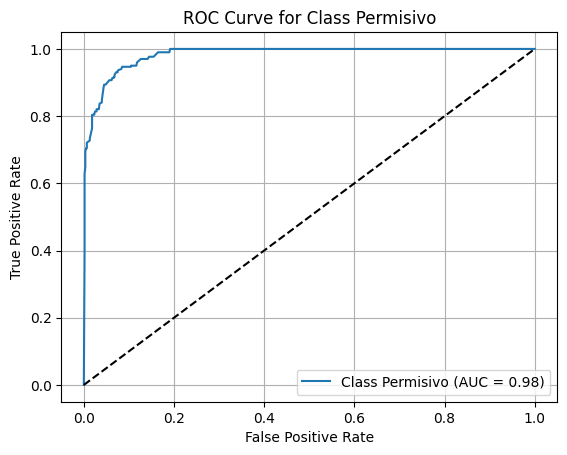

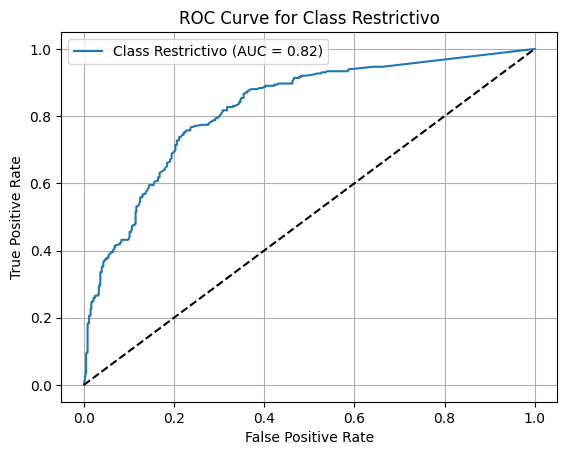

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilidades para Curva ROC
y_probs_rf = rf_model_bal_manual.predict_proba(X_test_bal_manual)

# Calcular y graficar ROC para cada clase
for i, class_label in enumerate(rf_model_bal_manual.classes_):
    fpr, tpr, thresholds = roc_curve(y_test_bal_manual == class_label, y_probs_rf[:, i])
    auc = roc_auc_score(y_test_bal_manual == class_label, y_probs_rf[:, i])
    
    plt.figure()
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve for Class {class_label}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()


### Optimización de hiperparámetros

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Definir la cuadrícula de parámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Entrenar el modelo con la búsqueda en cuadrícula
grid_search.fit(X_train_bal_manual, y_train_bal_manual)

# Obtener el mejor modelo
best_rf_model = grid_search.best_estimator_

# Evaluar el mejor modelo
y_pred_best_rf = best_rf_model.predict(X_test_bal_manual)
accuracy_best_rf = accuracy_score(y_test_bal_manual, y_pred_best_rf)
classification_report_best_rf = classification_report(y_test_bal_manual, y_pred_best_rf, output_dict=True)

# Mostrar resultados
print("Mejores Hiperparámetros:", grid_search.best_params_)
print("Precisión del Mejor Modelo:", accuracy_best_rf)
classification_report_df = pd.DataFrame(classification_report_best_rf).transpose()
classification_report_df



Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.6s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.6s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_s

precision    recall  f1-score     support
Neutral        0.605678  0.640000  0.622366  300.000000
Permisivo      0.835329  0.926910  0.878740  301.000000
Restrictivo    0.673307  0.561462  0.612319  301.000000
accuracy       0.709534  0.709534  0.709534    0.709534
macro avg      0.704771  0.709457  0.704475  902.000000
weighted avg   0.704881  0.709534  0.704566  902.000000

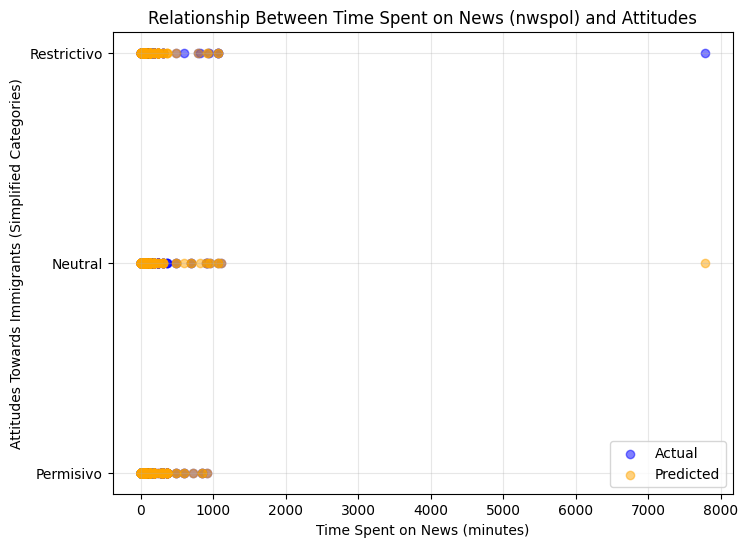

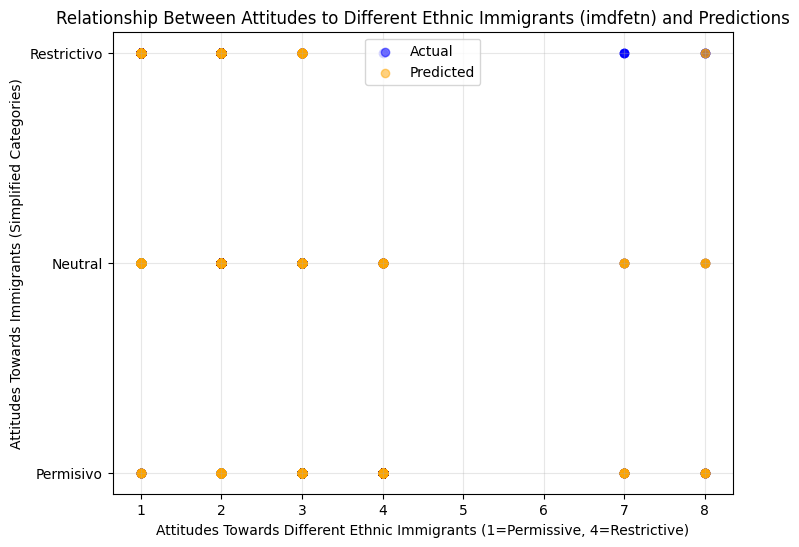

In [30]:
import matplotlib.pyplot as plt

# Relación entre nwspol y predicciones
plt.figure(figsize=(8, 6))
plt.scatter(X_test_bal_manual['nwspol'], y_test_bal_manual, alpha=0.5, label='Actual', color='blue')
plt.scatter(X_test_bal_manual['nwspol'], y_pred_best_rf, alpha=0.5, label='Predicted', color='orange')
plt.title('Relationship Between Time Spent on News (nwspol) and Attitudes')
plt.xlabel('Time Spent on News (minutes)')
plt.ylabel('Attitudes Towards Immigrants (Simplified Categories)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Relación entre imdfetn y predicciones
plt.figure(figsize=(8, 6))
plt.scatter(X_test_bal_manual['imdfetn'], y_test_bal_manual, alpha=0.5, label='Actual', color='blue')
plt.scatter(X_test_bal_manual['imdfetn'], y_pred_best_rf, alpha=0.5, label='Predicted', color='orange')
plt.title('Relationship Between Attitudes to Different Ethnic Immigrants (imdfetn) and Predictions')
plt.xlabel('Attitudes Towards Different Ethnic Immigrants (1=Permissive, 4=Restrictive)')
plt.ylabel('Attitudes Towards Immigrants (Simplified Categories)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()




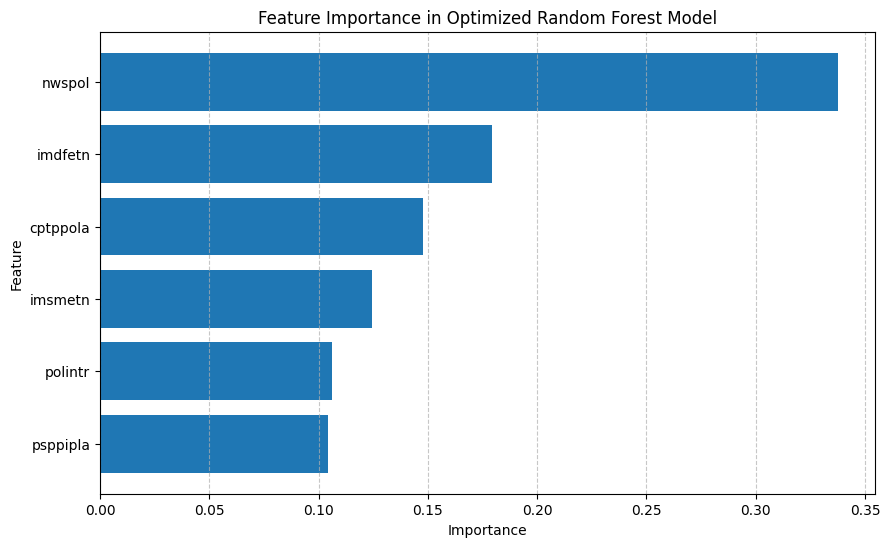

In [31]:
# Importancia de las características
feature_importance_df = pd.DataFrame({
    'Feature': X_train_bal_manual.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance in Optimized Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



In [ ]:
import shap

# Crear el explicador SHAP
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X_test_bal_manual)

# Visualización de la importancia global de las características
shap.summary_plot(shap_values[1], X_test_bal_manual)



ImportError: Numba needs NumPy 2.0 or less. Got NumPy 2.2.